dataset link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [178]:
# Import Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [2]:
# Load data
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check data shape
data.shape

(284807, 31)

In [4]:
# Get columns' names
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# Checking for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Get loaded data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Data description
data.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# print target data repartition
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# Calulate the percentage of fraudulent transaction
amount_normal_trans = len(data[data.Class==0])
amount_fraud_trans = len(data[data.Class==1])
fraud_percentage = (amount_fraud_trans/amount_normal_trans)*100
print(f"Fraudulent Transactions Percentage in our data is is {round(fraud_percentage,2)}%")
print(f"Normal Transactions Percentage in our data is is {round(100-fraud_percentage,2)}%")

Fraudulent Transactions Percentage in our data is is 0.17%
Normal Transactions Percentage in our data is is 99.83%


In [10]:
dd = data.groupby("Class")
dd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


<AxesSubplot:>

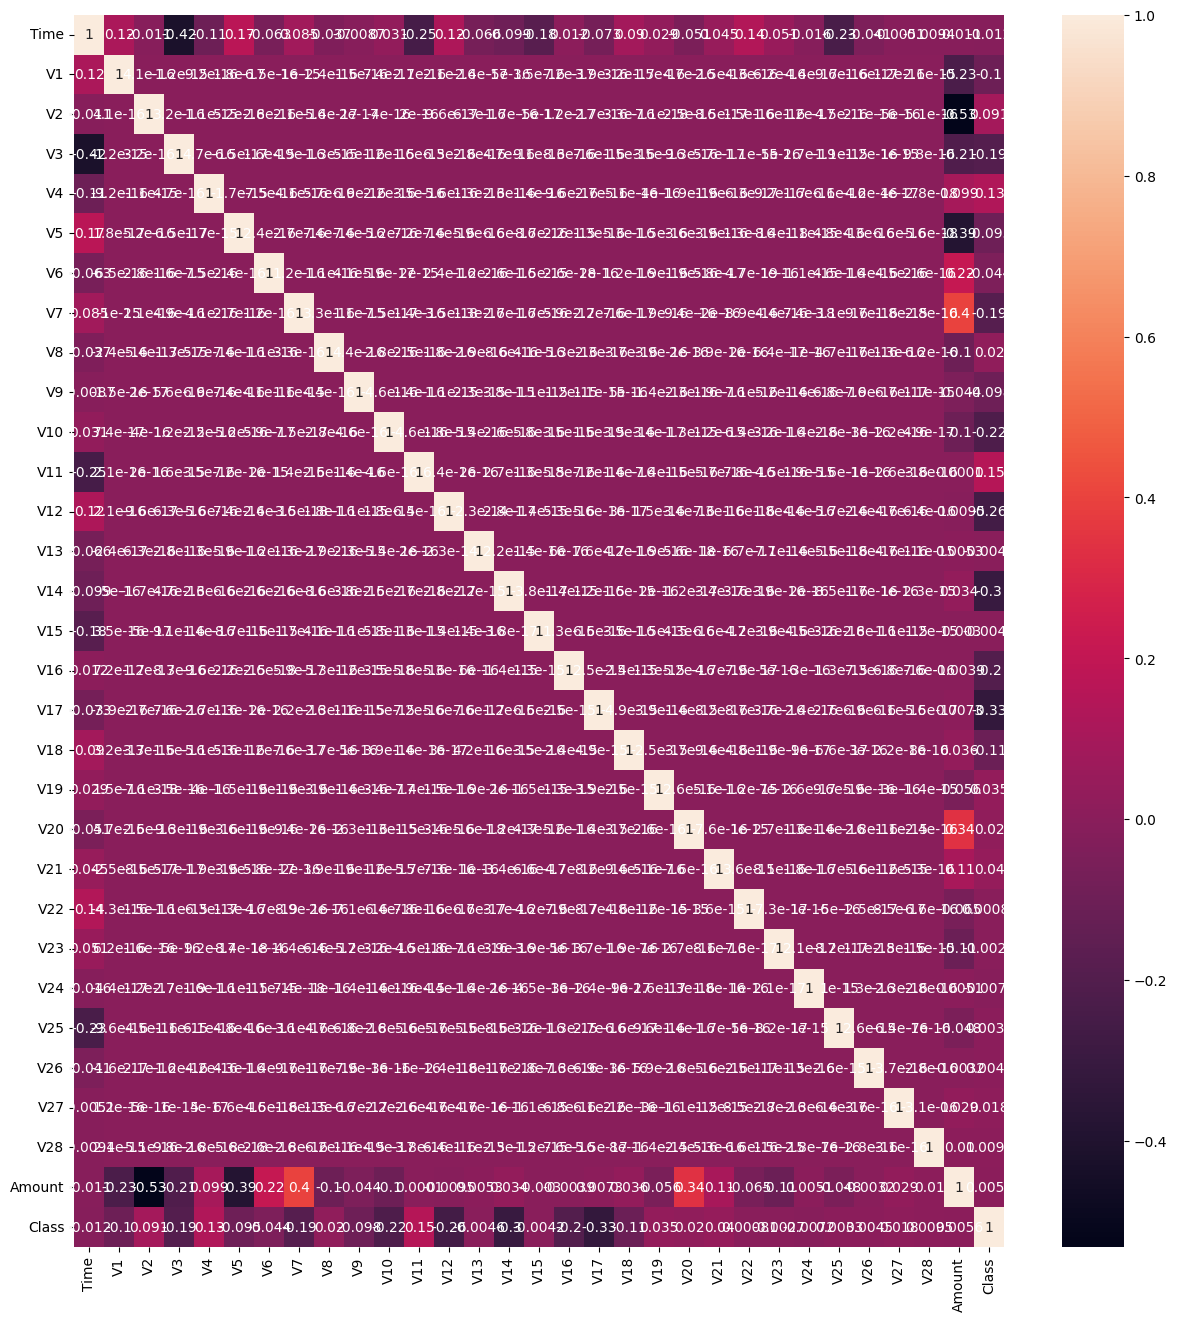

In [11]:
# Checking the correlation between features
#sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(15,16))
sns.heatmap(data.corr(), annot=True)

In [12]:
data['Amount'].head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [13]:
# Normalize the amount feature
scaler_object = StandardScaler()
amount_values = data["Amount"].values
data['Amount'] = scaler_object.fit_transform(amount_values.reshape(-1, 1))
data['Amount'].head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64

In [14]:
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,2.913952e-17,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


In [15]:
data['Time'].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Time, dtype: float64

In [16]:
# Dropping "Time" feature
data.drop(['Time'], axis=1, inplace=True)

In [17]:
# Search for duplicates
# The result shows we have 9144 duplicated values
data.duplicated().value_counts()

False    275663
True       9144
dtype: int64

In [18]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [19]:
# After dropping the duplicates, we only keep 275663 cols
data.shape

(275663, 30)

In [20]:
# Preparing our training and target data
X = data.drop("Class", axis=1).values
print(f"Training Data shape is {X.shape}")
y = data.pop("Class")
print(f"Training Tatget shape is {y.shape}")


Training Data shape is (275663, 29)
Training Tatget shape is (275663,)


In [21]:
# Split our data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(f"x_train shape is {x_train.shape}")
print(f"y_train shape is {y_train.shape}")
print(f"x_test shape is {x_test.shape}")
print(f"y_test shape is {y_test.shape}")

x_train shape is (192964, 29)
y_train shape is (192964,)
x_test shape is (82699, 29)
y_test shape is (82699,)


In [84]:
# Split our data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(f"x_train shape is {x_train.shape}")
print(f"y_train shape is {y_train.shape}")
print(f"x_test shape is {x_test.shape}")
print(f"y_test shape is {y_test.shape}")

x_train shape is (192964, 29)
y_train shape is (192964,)
x_test shape is (82699, 29)
y_test shape is (82699,)


# Models Building

## Decision Tree

In [85]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt_classifier.fit(x_train, y_train)
dt_predict = dt_classifier.predict(x_test)

In [86]:
dt_acc_score = accuracy_score(y_test, dt_predict)

In [87]:
print(f"Decision Tree Model Accuracy score {dt_acc_score*100}%")

Decision Tree Model Accuracy score 99.93107534553018%


In [93]:
dt_f1_sc = f1_score(y_test, dt_predict)
print(f"Decision Tree Model F1 score {dt_f1_sc*100}%")

Decision Tree Model F1 score 78.65168539325843%


In [35]:
confusion_matrix(y_test,dt_predict, labels=[0,1])

array([[82537,    26],
       [   31,   105]], dtype=int64)

<AxesSubplot:>

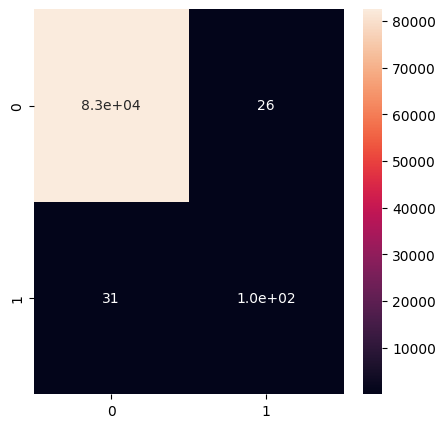

In [34]:
# plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,dt_predict, labels=[0,1]), annot=True)

In [74]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82563
           1       0.80      0.77      0.79       136

    accuracy                           1.00     82699
   macro avg       0.90      0.89      0.89     82699
weighted avg       1.00      1.00      1.00     82699



## K-Nearest Neigbors

In [38]:

knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(x_train, y_train)
knn_predict = knn_classifier.predict(x_test)

In [39]:
knn_acc_score = accuracy_score(y_test,knn_predict)
print(f"K-Nearest Neigbors Model Accuracy score {knn_acc_score*100}%")

K-Nearest Neigbors Model Accuracy score 99.94679500356716%


In [40]:
knn_f1_sc = f1_score(y_test,knn_predict)
print(f"K-Nearest Neigbors Model F1 score {knn_f1_sc*100}%")

K-Nearest Neigbors Model F1 score 82.67716535433071%


[[82550    13]
 [   31   105]]




<AxesSubplot:>

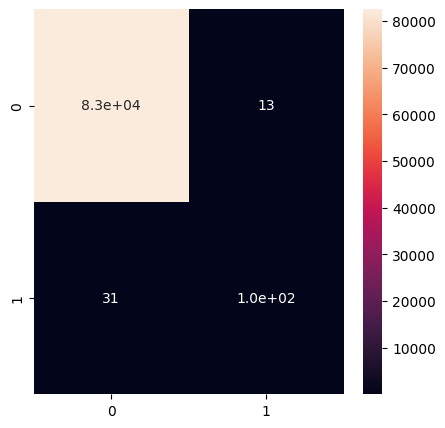

In [42]:
print(confusion_matrix(y_test, knn_predict, labels=[0,1]))
print("\n")

# plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, knn_predict, labels=[0,1]), annot=True)

In [73]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82563
           1       0.89      0.77      0.83       136

    accuracy                           1.00     82699
   macro avg       0.94      0.89      0.91     82699
weighted avg       1.00      1.00      1.00     82699



## Logistic Regression

In [43]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)
lr_predict = lr_classifier.predict(x_test)

In [44]:
lr_acc_score = accuracy_score(y_test, lr_predict)
print(f"Logistic Regression Model Accuracy score {lr_acc_score*100}%")

Logistic Regression Model Accuracy score 99.91293727856443%


In [45]:
lr_f1_sc = f1_score(y_test, lr_predict)
print(f"Logistic Regression Model F1 score {lr_f1_sc*100}%")

Logistic Regression Model F1 score 68.42105263157895%


<AxesSubplot:>

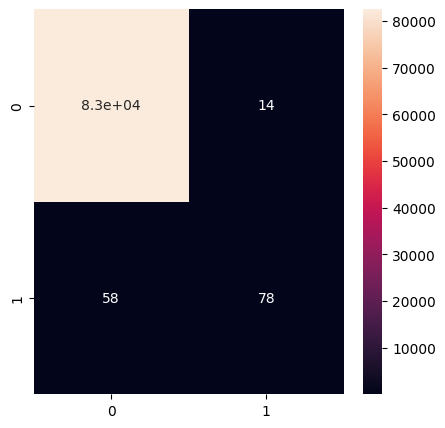

In [46]:
print(confusion_matrix(y_test, lr_predict, labels=[0,1]))
print("\n")

# plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, lr_predict, labels=[0,1]), annot=True)

In [72]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82563
           1       0.85      0.57      0.68       136

    accuracy                           1.00     82699
   macro avg       0.92      0.79      0.84     82699
weighted avg       1.00      1.00      1.00     82699



## SVM

In [47]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
svm_predict = svm_classifier.predict(x_test)

In [48]:
svm_acc_score = accuracy_score(y_test, svm_predict)
print(f"SVM Model Accuracy score {svm_acc_score*100}%")

SVM Model Accuracy score 99.93712136785209%


In [49]:
svm_f1_sc = f1_score(y_test, svm_predict)
print(f"SVM Model F1 score {svm_f1_sc*100}%")

SVM Model F1 score 77.77777777777779%


<AxesSubplot:>

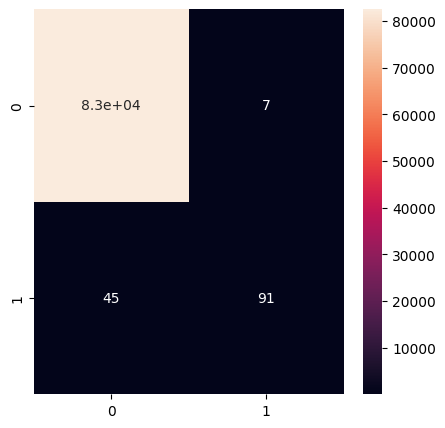

In [50]:
print(confusion_matrix(y_test, svm_predict, labels=[0,1]),"\n")

# plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, svm_predict, labels=[0,1]), annot=True)

In [71]:
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82563
           1       0.93      0.67      0.78       136

    accuracy                           1.00     82699
   macro avg       0.96      0.83      0.89     82699
weighted avg       1.00      1.00      1.00     82699



## Random Forest

In [51]:
rf_classifier = RandomForestClassifier(max_depth=4)
rf_classifier.fit(x_train, y_train)
rf_predict = rf_classifier.predict(x_test)

In [52]:
rf_acc_score = accuracy_score(y_test, rf_predict)
print(f"Random Forest Model Accuracy score {rf_acc_score*100}%")

Random Forest Model Accuracy score 99.93349375445895%


In [53]:
rf_f1_sc = f1_score(y_test, svm_predict)
print(f"Random Forest Model F1 score {rf_f1_sc*100}%")

Random Forest Model F1 score 77.77777777777779%


[[82550    13]
 [   42    94]] 



<AxesSubplot:>

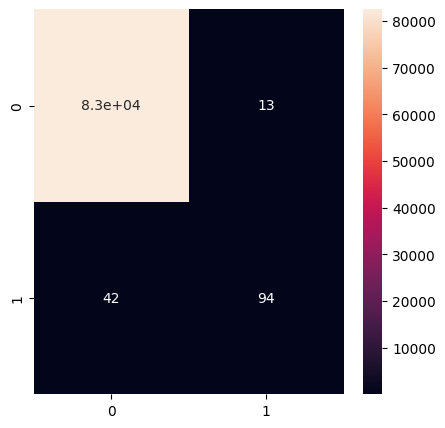

In [54]:
print(confusion_matrix(y_test, rf_predict, labels=[0,1]),"\n")

# plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, rf_predict, labels=[0,1]), annot=True)

In [70]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82563
           1       0.88      0.69      0.77       136

    accuracy                           1.00     82699
   macro avg       0.94      0.85      0.89     82699
weighted avg       1.00      1.00      1.00     82699



## XGBoost

In [55]:
xgb_classifier = RandomForestClassifier(max_depth=4)
xgb_classifier.fit(x_train, y_train)
xgb_predict = xgb_classifier.predict(x_test)

In [56]:
xgb_acc_score = accuracy_score(y_test, xgb_predict)
print(f"XGBoost Model Accuracy score {xgb_acc_score*100}%")

XGBoost Model Accuracy score 99.92865693660141%


In [58]:
xgb_f1_sc = f1_score(y_test, xgb_predict)
print(f"XGBoost Model F1 score {xgb_f1_sc*100}%")

XGBoost Model F1 score 75.51867219917013%


[[82549    14]
 [   45    91]] 



<AxesSubplot:>

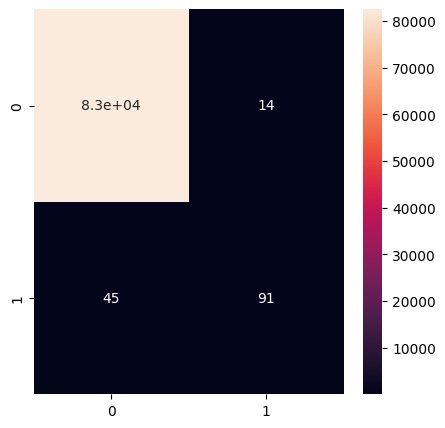

In [59]:
print(confusion_matrix(y_test, xgb_predict, labels=[0,1]),"\n")

# plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, xgb_predict, labels=[0,1]), annot=True)

In [69]:
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82563
           1       0.87      0.67      0.76       136

    accuracy                           1.00     82699
   macro avg       0.93      0.83      0.88     82699
weighted avg       1.00      1.00      1.00     82699



## Neural Network

In [153]:
nn_classifier = MLPClassifier()
nn_classifier.fit(x_train, y_train)
nn_predict = nn_classifier.predict(x_test)

In [154]:
nn_acc_score = accuracy_score(y_test, nn_predict)
print(f"Neural Network Model Accuracy score {nn_acc_score*100}%")

Neural Network Model Accuracy score 99.93712136785209%


In [155]:
nn_f1_sc = f1_score(y_test, nn_predict)
print(f"Neural Network Model F1 score {nn_f1_sc*100}%")

Neural Network Model F1 score 80.88235294117648%


[[82537    26]
 [   26   110]] 



<AxesSubplot:>

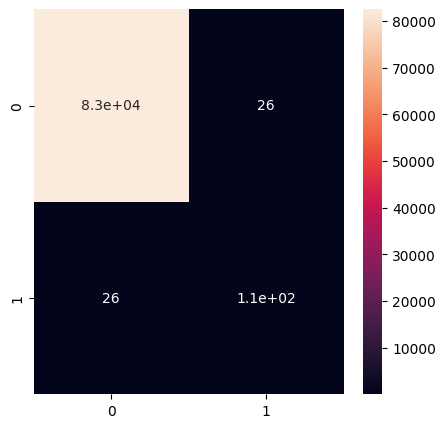

In [156]:
print(confusion_matrix(y_test, nn_predict, labels=[0,1]),"\n")

# plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, nn_predict, labels=[0,1]), annot=True)

In [157]:
print(classification_report(y_test, nn_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82563
           1       0.81      0.81      0.81       136

    accuracy                           1.00     82699
   macro avg       0.90      0.90      0.90     82699
weighted avg       1.00      1.00      1.00     82699



## Training Summary

In [158]:
all_model_acc = [dt_acc_score, knn_acc_score, lr_acc_score, svm_acc_score, rf_acc_score, xgb_acc_score, nn_acc_score]
all_model_acc_values = list()

for i in all_model_acc:
    all_model_acc_values.append(i)
    
print(len(all_model_acc_values))
print(all_model_acc)

7
[0.9993107534553017, 0.9994679500356716, 0.9991293727856443, 0.9993712136785209, 0.9993349375445895, 0.9992865693660141, 0.9993712136785209]


In [159]:
ml_df = pd.DataFrame({"model_name":["Decision_Tree", "KNN", "Logistic_Regression", "SVM","Random_Forest","XGBoost","Neural_Network"],
                     "accuracy":all_model_acc_values})

ml_df.head()

,model_name,accuracy
0,Decision_Tree,0.999311
1,KNN,0.999468
2,Logistic_Regression,0.999129
3,SVM,0.999371
4,Random_Forest,0.999335


<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

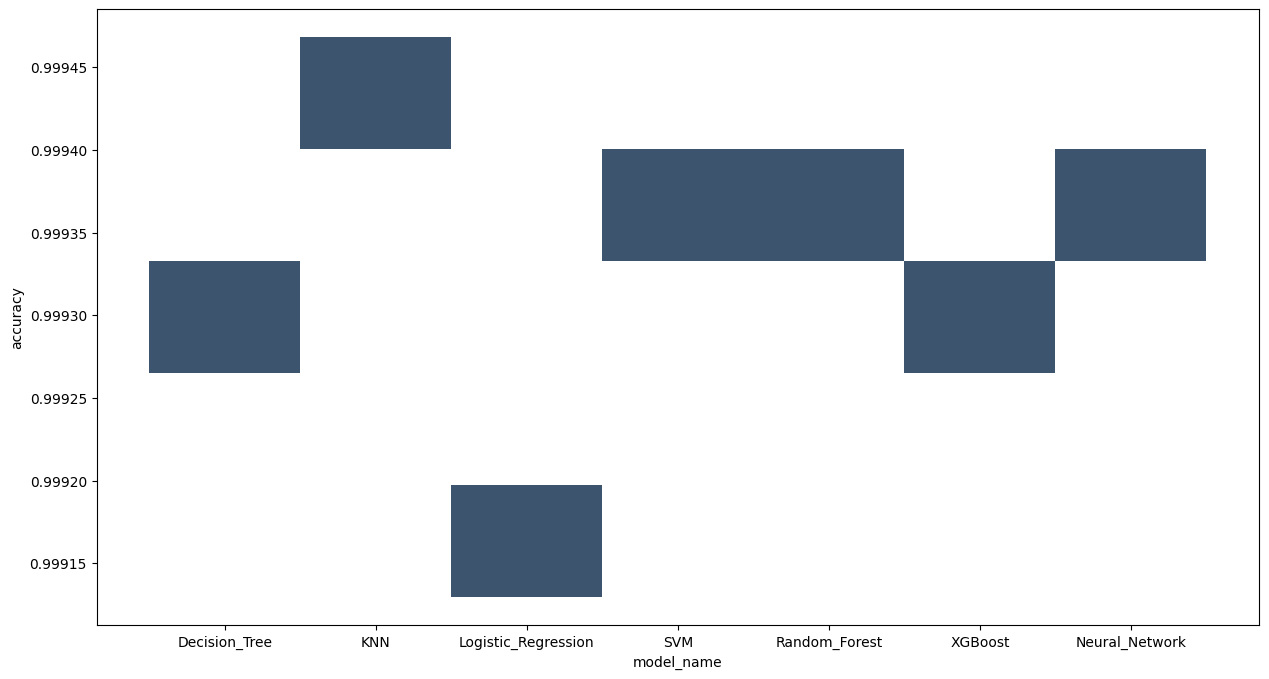

In [160]:
plt.figure(figsize=(15, 8))
sns.histplot(x=ml_df["model_name"], y=ml_df["accuracy"])

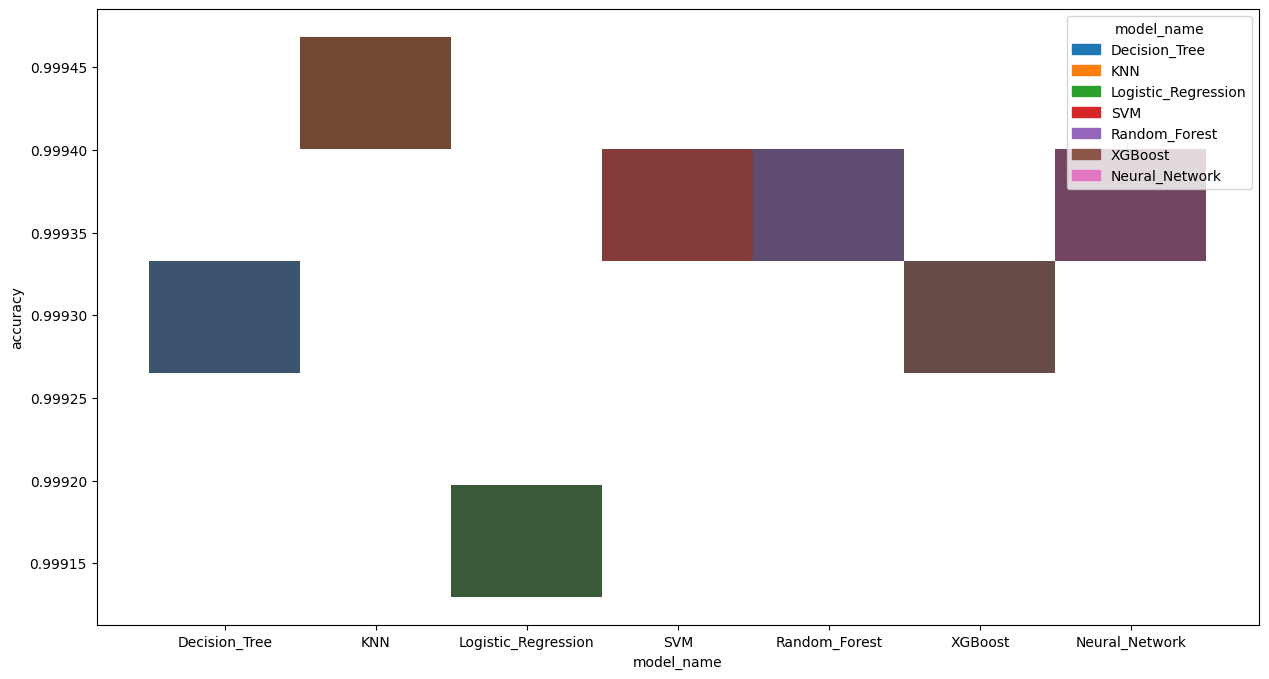

In [161]:
plt.figure(figsize=(15, 8))

graph = sns.histplot(data=ml_df, x="model_name", y="accuracy", hue="model_name")
# to change the legends location
#graph.legend(bbox_to_anchor= (1.2,1))
plt.show()

<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

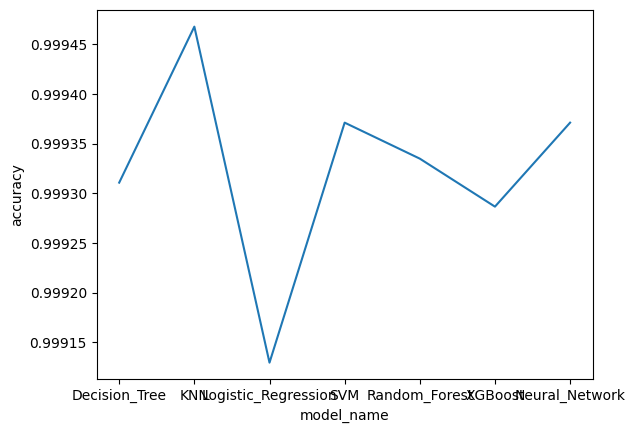

In [162]:
sns.lineplot(x=ml_df["model_name"], y=ml_df["accuracy"])

## TESTING

In [163]:
test_sample = x_test[0].reshape(1, -1)
result = dt_classifier.predict(test_sample)
if int(result)==0:
    print("Normal Transaction")
else:
    print("Fradulent Transaction")

Normal Transaction


In [164]:
def pred_func(model, test_data):
    test_sample = test_data.reshape(1, -1)
    result = model.predict(test_sample)
    if int(result)==0:
        return print("Normal Transaction")
    else:
        return print("Fradulent Transaction")

In [169]:
pred_func(knn_classifier, x_test[82698])

Normal Transaction


In [170]:
pred_func(nn_classifier, x_test[82698])

Normal Transaction


## Tuning Hyperparameters on KNN Classifier

In [ ]:
param_grid = [{
    "n_neighbors":[1,3,5,7],
    "weights": ["uniform", "distance"]
}]

grid_search = GridSearchCV(knn_classifier, param_grid, cv=3, scoring='accuracy', return_train_score=True, verbose=10)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START n_neighbors=1, weights=uniform..............................
[CV 1/3; 1/8] END n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.999) total time= 2.9min
[CV 2/3; 1/8] START n_neighbors=1, weights=uniform..............................
[CV 2/3; 1/8] END n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.999) total time= 2.8min
[CV 3/3; 1/8] START n_neighbors=1, weights=uniform..............................
[CV 3/3; 1/8] END n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.999) total time= 3.1min
[CV 1/3; 2/8] START n_neighbors=1, weights=distance.............................
[CV 1/3; 2/8] END n_neighbors=1, weights=distance;, score=(train=1.000, test=0.999) total time= 3.0min
[CV 2/3; 2/8] START n_neighbors=1, weights=distance.............................
[CV 2/3; 2/8] END n_neighbors=1, weights=distance;, score=(train=1.000, test=0.999) total time= 2.6min
[CV 3/3; 2/8] START n_n

In [ ]:
# From above search, let's see which configuration of knn is the best
final_knn_classifier = grid_search.best_estimator_

In [ ]:
# Test the best
final_knn_classifier.score(x_test, y_test)